In [68]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-dataset-2019/diabetes_dataset__2019.csv


In [69]:
dataset = pd.read_csv("/kaggle/input/diabetes-dataset-2019/diabetes_dataset__2019.csv")
dataset.head()

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
0,50-59,Male,no,yes,one hr or more,39.0,no,no,8,6,no,occasionally,sometimes,high,0.0,0,not much,no
1,50-59,Male,no,yes,less than half an hr,28.0,no,no,8,6,yes,very often,sometimes,normal,0.0,0,not much,no
2,40-49,Male,no,no,one hr or more,24.0,no,no,6,6,no,occasionally,sometimes,normal,0.0,0,not much,no
3,50-59,Male,no,no,one hr or more,23.0,no,no,8,6,no,occasionally,sometimes,normal,0.0,0,not much,no
4,40-49,Male,no,no,less than half an hr,27.0,no,no,8,8,no,occasionally,sometimes,normal,0.0,0,not much,no


In [70]:
dataset.shape

(952, 18)

## Preparação

[Link do artigo do conjunto](https://pdf.sciencedirectassets.com/280203/1-s2.0-S1877050920X00056/1-s2.0-S1877050920308024/main.pdf?X-Amz-Security-Token=IQoJb3JpZ2luX2VjEKv%2F%2F%2F%2F%2F%2F%2F%2F%2F%2FwEaCXVzLWVhc3QtMSJHMEUCIGJ%2F76ztqW6WJmw7rGLpMcX5ofvq0rSGVejBnnXRCo75AiEA%2FVQJNdSJSkoGQoYsMkech6KfWrOti%2BJV5xEYndaBVyYqswUIYxAFGgwwNTkwMDM1NDY4NjUiDMZ35YYu7dktUHF5siqQBStZGBOlkreUcuPXBkux%2FkmZEHIM6wADBwTidwsr7fVPdGmKTE7Fq3VriESYLPciq0WB%2BQG2ehnlHR7%2F7QQxtXlCAE7sIc0lL4%2FxLfBFz9A3aNN8KEjFAlbw2TTg82VD6HfbZEUo%2B0pLLkkFZCQwVLqVedCsgtmx1jK9%)

In [71]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               952 non-null    object 
 1   Gender            952 non-null    object 
 2   Family_Diabetes   952 non-null    object 
 3   highBP            952 non-null    object 
 4   PhysicallyActive  952 non-null    object 
 5   BMI               948 non-null    float64
 6   Smoking           952 non-null    object 
 7   Alcohol           952 non-null    object 
 8   Sleep             952 non-null    int64  
 9   SoundSleep        952 non-null    int64  
 10  RegularMedicine   952 non-null    object 
 11  JunkFood          952 non-null    object 
 12  Stress            952 non-null    object 
 13  BPLevel           952 non-null    object 
 14  Pregancies        910 non-null    float64
 15  Pdiabetes         951 non-null    object 
 16  UriationFreq      952 non-null    object 
 1

In [72]:
dataset = dataset.dropna(subset= ["Diabetic"])

In [73]:
x, y = dataset.drop("Diabetic", axis=1), dataset["Diabetic"]

x

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq
0,50-59,Male,no,yes,one hr or more,39.0,no,no,8,6,no,occasionally,sometimes,high,0.0,0,not much
1,50-59,Male,no,yes,less than half an hr,28.0,no,no,8,6,yes,very often,sometimes,normal,0.0,0,not much
2,40-49,Male,no,no,one hr or more,24.0,no,no,6,6,no,occasionally,sometimes,normal,0.0,0,not much
3,50-59,Male,no,no,one hr or more,23.0,no,no,8,6,no,occasionally,sometimes,normal,0.0,0,not much
4,40-49,Male,no,no,less than half an hr,27.0,no,no,8,8,no,occasionally,sometimes,normal,0.0,0,not much
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,less than 40,Male,yes,no,more than half an hr,25.0,no,no,8,6,no,often,sometimes,normal,0.0,0,not much
948,60 or older,Male,yes,yes,more than half an hr,27.0,no,no,6,5,yes,occasionally,sometimes,high,0.0,0,quite often
949,60 or older,Male,no,yes,none,23.0,no,no,6,5,yes,occasionally,sometimes,high,0.0,0,not much
950,60 or older,Male,no,yes,less than half an hr,27.0,no,yes,6,5,yes,occasionally,very often,high,0.0,0,not much


### Corrigindo Inconsistências de Preenchimento

In [74]:
y.value_counts(dropna = False)

Diabetic
no     684
yes    266
 no      1
Name: count, dtype: int64

In [75]:
y = y.replace([" no"], ["no"])

In [76]:
y.value_counts(dropna = False)

Diabetic
no     685
yes    266
Name: count, dtype: int64

In [77]:
for col in x.columns:
    if x[col].dtype == 'object': 
        print(f"\nColumn: {col}")
        print(x[col].value_counts(dropna=False))


Column: Age
Age
less than 40    487
40-49           164
50-59           156
60 or older     144
Name: count, dtype: int64

Column: Gender
Gender
Male      580
Female    371
Name: count, dtype: int64

Column: Family_Diabetes
Family_Diabetes
no     498
yes    453
Name: count, dtype: int64

Column: highBP
highBP
no     723
yes    228
Name: count, dtype: int64

Column: PhysicallyActive
PhysicallyActive
less than half an hr    336
more than half an hr    271
one hr or more          212
none                    132
Name: count, dtype: int64

Column: Smoking
Smoking
no     843
yes    108
Name: count, dtype: int64

Column: Alcohol
Alcohol
no     759
yes    192
Name: count, dtype: int64

Column: RegularMedicine
RegularMedicine
no     614
yes    336
o        1
Name: count, dtype: int64

Column: JunkFood
JunkFood
occasionally    671
often           184
very often       52
always           44
Name: count, dtype: int64

Column: Stress
Stress
sometimes     564
very often    164
not at all    135
alw

In [78]:
x["RegularMedicine"] = x["RegularMedicine"].replace(["o"], ["no"])

x["BPLevel"] = x["BPLevel"].replace(["High", "Low", "normal "], ["high", "low", "normal"])

x["Pdiabetes"] = x["Pdiabetes"].replace(["0"], ["no"])

In [79]:
for col in x.columns:
    if x[col].dtype == 'object': 
        print(f"\nColumn: {col}")
        print(x[col].value_counts(dropna=False))


Column: Age
Age
less than 40    487
40-49           164
50-59           156
60 or older     144
Name: count, dtype: int64

Column: Gender
Gender
Male      580
Female    371
Name: count, dtype: int64

Column: Family_Diabetes
Family_Diabetes
no     498
yes    453
Name: count, dtype: int64

Column: highBP
highBP
no     723
yes    228
Name: count, dtype: int64

Column: PhysicallyActive
PhysicallyActive
less than half an hr    336
more than half an hr    271
one hr or more          212
none                    132
Name: count, dtype: int64

Column: Smoking
Smoking
no     843
yes    108
Name: count, dtype: int64

Column: Alcohol
Alcohol
no     759
yes    192
Name: count, dtype: int64

Column: RegularMedicine
RegularMedicine
no     615
yes    336
Name: count, dtype: int64

Column: JunkFood
JunkFood
occasionally    671
often           184
very often       52
always           44
Name: count, dtype: int64

Column: Stress
Stress
sometimes     564
very often    164
not at all    135
always        

### Busca por Outliers

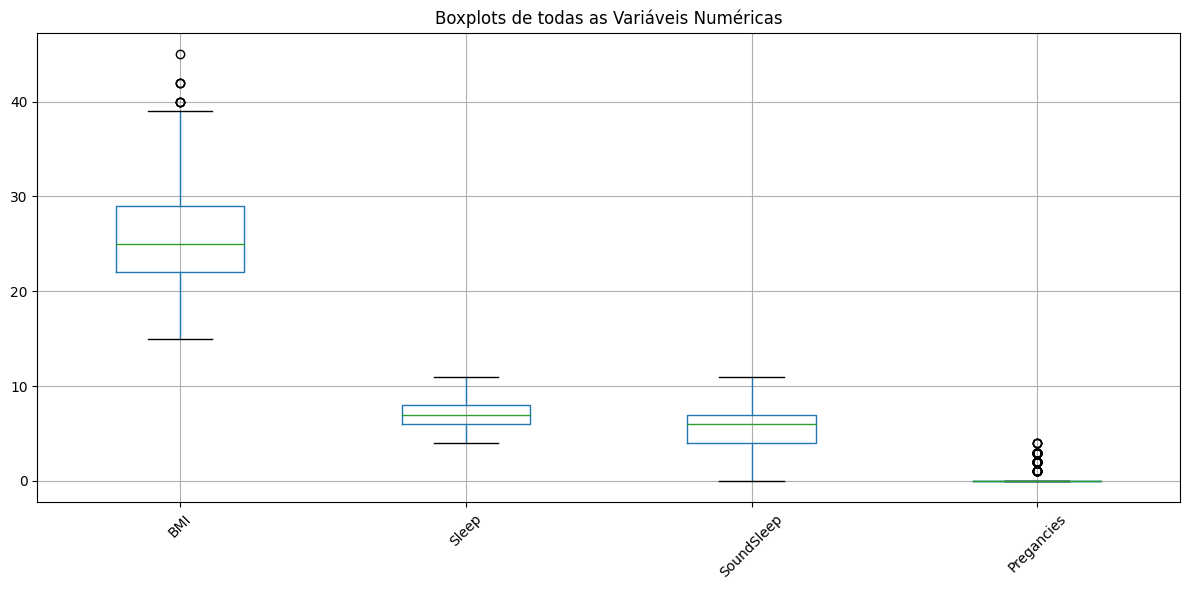

In [80]:
import matplotlib.pyplot as plt

x.boxplot(figsize=(12, 6))
plt.title("Boxplots de todas as Variáveis Numéricas")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Salvamento

In [81]:
pd.concat([x, y], axis = 1).to_excel("Tigganeha4 (Cleaned).xlsx")

### Encoding e Separação

In [82]:
y = y.replace(["yes", "no"], [1, 0])

/tmp/ipykernel_125/743619656.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace(["yes", "no"], [1, 0])


In [83]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

class StringNormalizer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_normalized = X.copy()
        for col in X_normalized.columns:
            X_normalized[col] = X_normalized[col].astype(str).str.strip().str.capitalize()
        return X_normalized

In [84]:
categorical_cols = [
    "Age", "Gender", "Family_Diabetes", "highBP",
    "PhysicallyActive", "Smoking", "Alcohol",
    "RegularMedicine", "JunkFood", "Stress",
    "BPLevel", "Pdiabetes", "UriationFreq"
]

preprocessing_pipeline = Pipeline([
    ("normalize", StringNormalizer()),
    ("preprocess", ColumnTransformer([
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), categorical_cols)
    ], remainder="passthrough")),
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

x_normalized = StringNormalizer().fit_transform(x)

In [85]:

# Split
x_train, x_test, y_train, y_test = train_test_split(
    x_normalized, y, test_size=0.3, stratify=y, random_state=42
)

# Fit no pipeline completo só com treino
x_train_processed = preprocessing_pipeline.fit_transform(x_train)
x_test_processed = preprocessing_pipeline.transform(x_test)

# Salvar pipeline para API
joblib.dump(preprocessing_pipeline, "full_pipeline.pkl")

['full_pipeline.pkl']

In [86]:
onehot_encoder = preprocessing_pipeline.named_steps["preprocess"].named_transformers_["cat"]
category_mapping = {
    col: cats.tolist()
    for col, cats in zip(categorical_cols, encoder.categories_)
}

import pprint
pprint.pprint(category_mapping)

{'Age': ['40-49', '50-59', '60 or older', 'Less than 40'],
 'Alcohol': ['No', 'Yes'],
 'BPLevel': ['High', 'Low', 'Normal'],
 'Family_Diabetes': ['No', 'Yes'],
 'Gender': ['Female', 'Male'],
 'JunkFood': ['Always', 'Occasionally', 'Often', 'Very often'],
 'Pdiabetes': ['Nan', 'No', 'Yes'],
 'PhysicallyActive': ['Less than half an hr',
                      'More than half an hr',
                      'None',
                      'One hr or more'],
 'RegularMedicine': ['No', 'Yes'],
 'Smoking': ['No', 'Yes'],
 'Stress': ['Always', 'Not at all', 'Sometimes', 'Very often'],
 'UriationFreq': ['Not much', 'Quite often'],
 'highBP': ['No', 'Yes']}


In [87]:
import json

with open("category_mapping.json", "w") as f:
    json.dump(category_mapping, f, indent=4)


In [95]:
y_train.value_counts()

Diabetic
0    479
1    186
Name: count, dtype: int64

In [96]:
y_test.value_counts()

Diabetic
0    206
1     80
Name: count, dtype: int64

## Treinamento

In [92]:
import numpy as np
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict, cross_validate

def avalia_modelo(modelo, x, y, dummy=False, multiclass=False):
    if dummy:
        resultados = cross_validate(modelo, x, y,
                                    scoring=["accuracy"],
                                    cv=10, n_jobs=-1)
        print(f'Modelo: {modelo}')
        media_acuracia = np.mean(resultados["test_accuracy"])
        print(f'Acurácia --> {media_acuracia:.4f}')
    
    if multiclass:
        resultados = cross_validate(modelo, x, y,
                                    scoring=["accuracy", "f1_weighted", "precision_weighted", "recall_weighted"],
                                    cv=5, n_jobs=-1)
        print(f'Modelo: {modelo}')
        
        print("\nMétricas Gerais")
        media_acuracia = np.mean(resultados["test_accuracy"])
        media_precisao = np.mean(resultados["test_precision_weighted"])
        media_recall = np.mean(resultados["test_recall_weighted"])
        media_f1 = np.mean(resultados["test_f1_weighted"])

        print(f'Acurácia --> {media_acuracia:.4f}')
        print(f'Precisão --> {media_precisao:.4f}')
        print(f'Recall --> {media_recall:.4f}')
        print(f'F1 --> {media_f1:.4f}')
    
    else:
        resultados = cross_validate(modelo, x, y,
                                    scoring=["accuracy", "f1", "precision", "recall"],
                                    cv=10, n_jobs=-1)
        print(f'Modelo: {modelo}')

        media_acuracia = np.mean(resultados["test_accuracy"])
        media_precisao = np.mean(resultados["test_precision"])
        media_recall = np.mean(resultados["test_recall"])
        media_f1 = np.mean(resultados["test_f1"])

        print(f'Acurácia --> {media_acuracia:.4f}')
        print(f'Precisão --> {media_precisao:.4f}')
        print(f'Recall --> {media_recall:.4f}')
        print(f'F1 --> {media_f1:.4f}')

        # Generate a detailed classification report using cross-validation predictions
        y_pred = cross_val_predict(modelo, x, y, cv=10)
        report = classification_report(y, y_pred)
        print("\nRelatório de Classificação:\n")
        print(report)

In [93]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [97]:
models = [
    ('SVC', SVC(probability=True, random_state=RANDOM_STATE)),
    ('Logistic Regression', LogisticRegression(class_weight = "balanced", random_state=42)),
    ('KNN', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier(random_state=RANDOM_STATE)),
    ('Random Forest', RandomForestClassifier(random_state=RANDOM_STATE)),
    ('AdaBoost', AdaBoostClassifier(random_state=RANDOM_STATE)),
    ('Extra Trees', ExtraTreesClassifier(random_state=RANDOM_STATE)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=RANDOM_STATE)),
    ('XGBoost', XGBClassifier(random_state=RANDOM_STATE)),
    ('LightGBM', LGBMClassifier(random_state=RANDOM_STATE, verbose=0)),
    ('CatBoost', CatBoostClassifier(random_state=RANDOM_STATE, verbose=0)), 
]

for name, model in models:
    print("\n")
    print("-" * 100)
    print(f"\nAvaliando o Modelo: {name}")
    avalia_modelo(model, x_train_processed, y_train, multiclass=False, dummy=False)



----------------------------------------------------------------------------------------------------

Avaliando o Modelo: SVC
Modelo: SVC(probability=True, random_state=42)
Acurácia --> 0.9204
Precisão --> 0.8808
Recall --> 0.8348
F1 --> 0.8521

Relatório de Classificação:

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       479
           1       0.88      0.83      0.85       186

    accuracy                           0.92       665
   macro avg       0.91      0.89      0.90       665
weighted avg       0.92      0.92      0.92       665



----------------------------------------------------------------------------------------------------

Avaliando o Modelo: Logistic Regression
Modelo: LogisticRegression(class_weight='balanced', random_state=42)
Acurácia --> 0.8482
Precisão --> 0.6907
Recall --> 0.8608
F1 --> 0.7624

Relatório de Classificação:

              precision    recall  f1-score   support

           0       0.94   

## Modelo

In [100]:
x_full = np.concatenate([x_train_processed, x_test_processed], axis=0)

y_full = pd.concat([y_train, y_test], axis=0)

final_lgbm = LGBMClassifier(random_state=42)
final_lgbm.fit(x_full, y_full)

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier(random_state=42)

In [101]:
joblib.dump(final_lgbm, "tiganneha4_diabetes_lightgbm.pkl")

['tiganneha4_diabetes_lightgbm.pkl']